# KNN Classsifier

* The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning technique used for both classification and regression, but most commonly for classification.
* KNN classifies a new data point based on the majority class of its nearest neighbors in the training dataset.


# 

# Steps For KNN:
1. Choose the number of neighbors (k)
→ Example: k = 3 or k = 5.
2. Calculate distance between the new data point and all other points in the   dataset.
Common distance metrics:

 * Euclidean distance(preferable)
 * Manhattean distance
 * Minkowski distance

3. Find the k nearest points (lowest distances).
4. Count the classes of these neighbors.
5. Assign the majority class to the new data point.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Load Dataset

In [5]:
datset=pd.read_csv(r"C:\Users\HP\Downloads\New folder\14th- knn\projects\KNN\brest cancer.txt")

# EDA

In [6]:
datset.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [7]:
datset.shape

(698, 11)

In [9]:
# Rename column names
# We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns

datset.columns=['ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [10]:
datset.columns

Index(['ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [11]:
datset.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [12]:
# Drop redundant columns

datset.drop(['ID'],axis=1,inplace=True)

In [14]:
datset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              698 non-null    int64 
 1   Uniformity of Cell Size      698 non-null    int64 
 2   Uniformity of Cell Shape     698 non-null    int64 
 3   Marginal Adhesion            698 non-null    int64 
 4   Single Epithelial Cell Size  698 non-null    int64 
 5   Bare Nuclei                  698 non-null    object
 6   Bland Chromatin              698 non-null    int64 
 7   Normal Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


We can see that there are 9 numerical variables and 1 categorical variable in the dataset. I will Convert data type of Bare_Nuclei to integer.

In [19]:
datset['Bare Nuclei']=pd.to_numeric(datset['Bare Nuclei'],errors='coerce')

In [20]:
datset.dtypes

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [21]:
# check for missing values

datset.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [23]:
# Check frequency distribution of values in 'Bare Nuclei' column
datset['Bare Nuclei'].value_counts()

Bare Nuclei
1.0     401
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [24]:
datset['Bare Nuclei'].unique()

array([10.,  2.,  4.,  1.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [25]:
# Check for nan values in 'Bare Nuclei' column

datset['Bare Nuclei'].isna().sum()

np.int64(16)

In [26]:
datset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,682.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.548387,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.972867,2.856606,2.215408,3.645226,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


We can see that there are 16 nan values in the dataset. I will impute missing values after dividing the dataset into training and test set.

In [32]:
# Impute missing values in 'Bare Nuclei' with the median and convert to integer
for col in ['Bare Nuclei']:
    datset[col] = datset[col].fillna(datset[col].median()).astype(int)

In [33]:
datset.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# Visaulization


# Univariate Analysis
Check the distribution of variables
Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed



QUICK VISUALIZATION

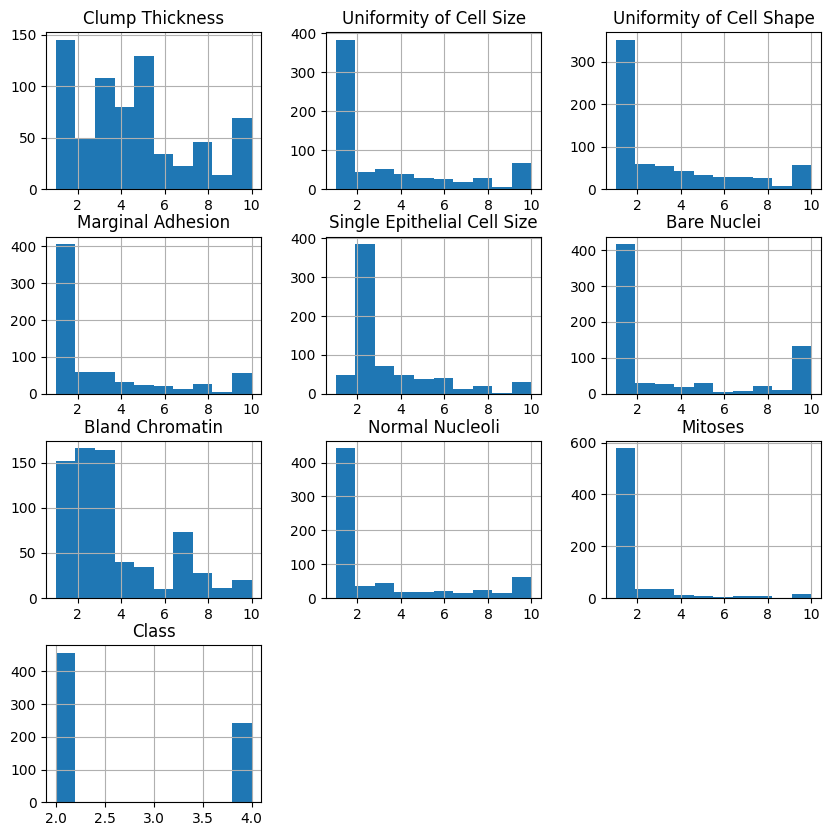

In [38]:
# Histogram Plots for all variables

import matplotlib.pyplot as plt
datset.hist(bins=10,figsize=(10,10))
plt.show()

REFINED VISUALIZATION

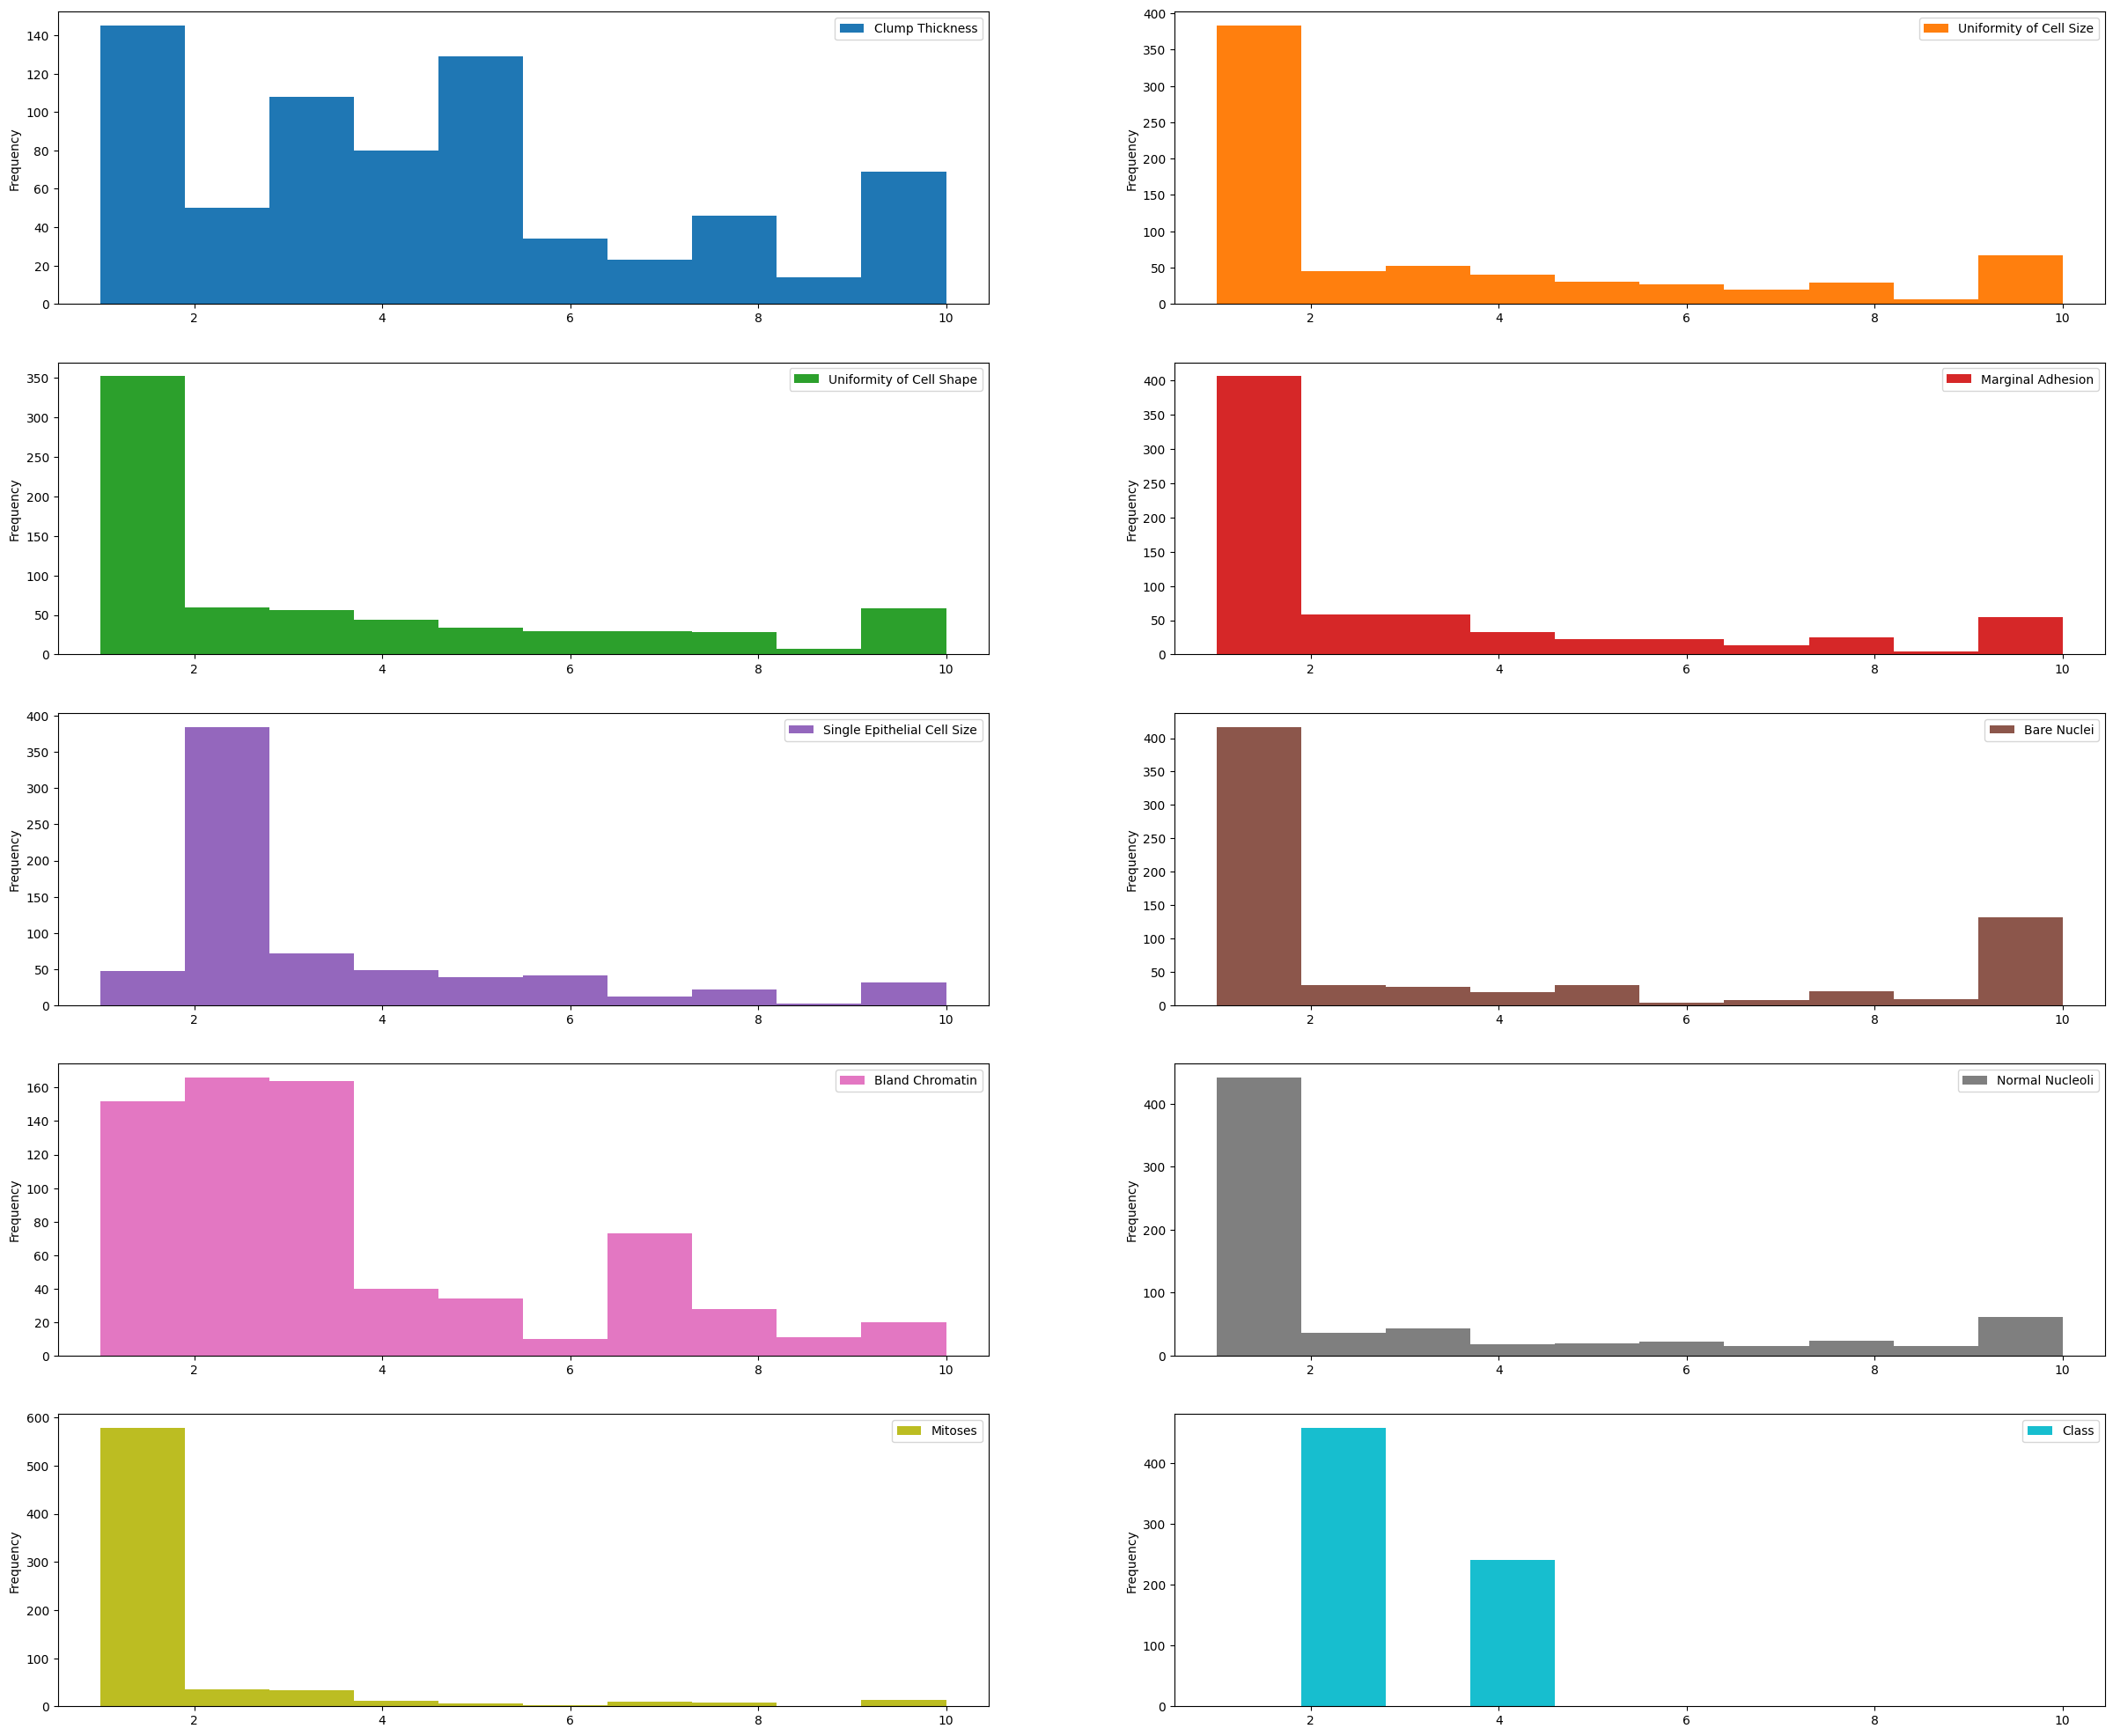

In [39]:

plt.rcParams['figure.figsize']=(30,25)
datset.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

We can see that all the variables in the dataset are positively skewed.

Multivariate plots

Estimating correlation coefficients¶
Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the df.corr()

Our target variable is Class. So, we should check how each attribute correlates with the Class variable

In [42]:
correlation=datset.corr()

In [44]:
correlation['class'].sort_values(ascending=False)

Class                          1.000000
Bare Nuclei                    0.818839
Uniformity of Cell Shape       0.818794
Uniformity of Cell Size        0.817772
Bland Chromatin                0.756732
Clump Thickness                0.716509
Normal Nucleoli                0.712067
Marginal Adhesion              0.696605
Single Epithelial Cell Size    0.682618
Mitoses                        0.423008
Name: class, dtype: float64

Interpretation¶

* The correlation coefficient ranges from -1 to +1.

* When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Class and Bare_Nuclei, Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.

* When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.

* We can see that all the variables are positively correlated with Class variable. Some variables are strongly positive correlated while some variables are negatively correlated

Correlation HEAT MAP


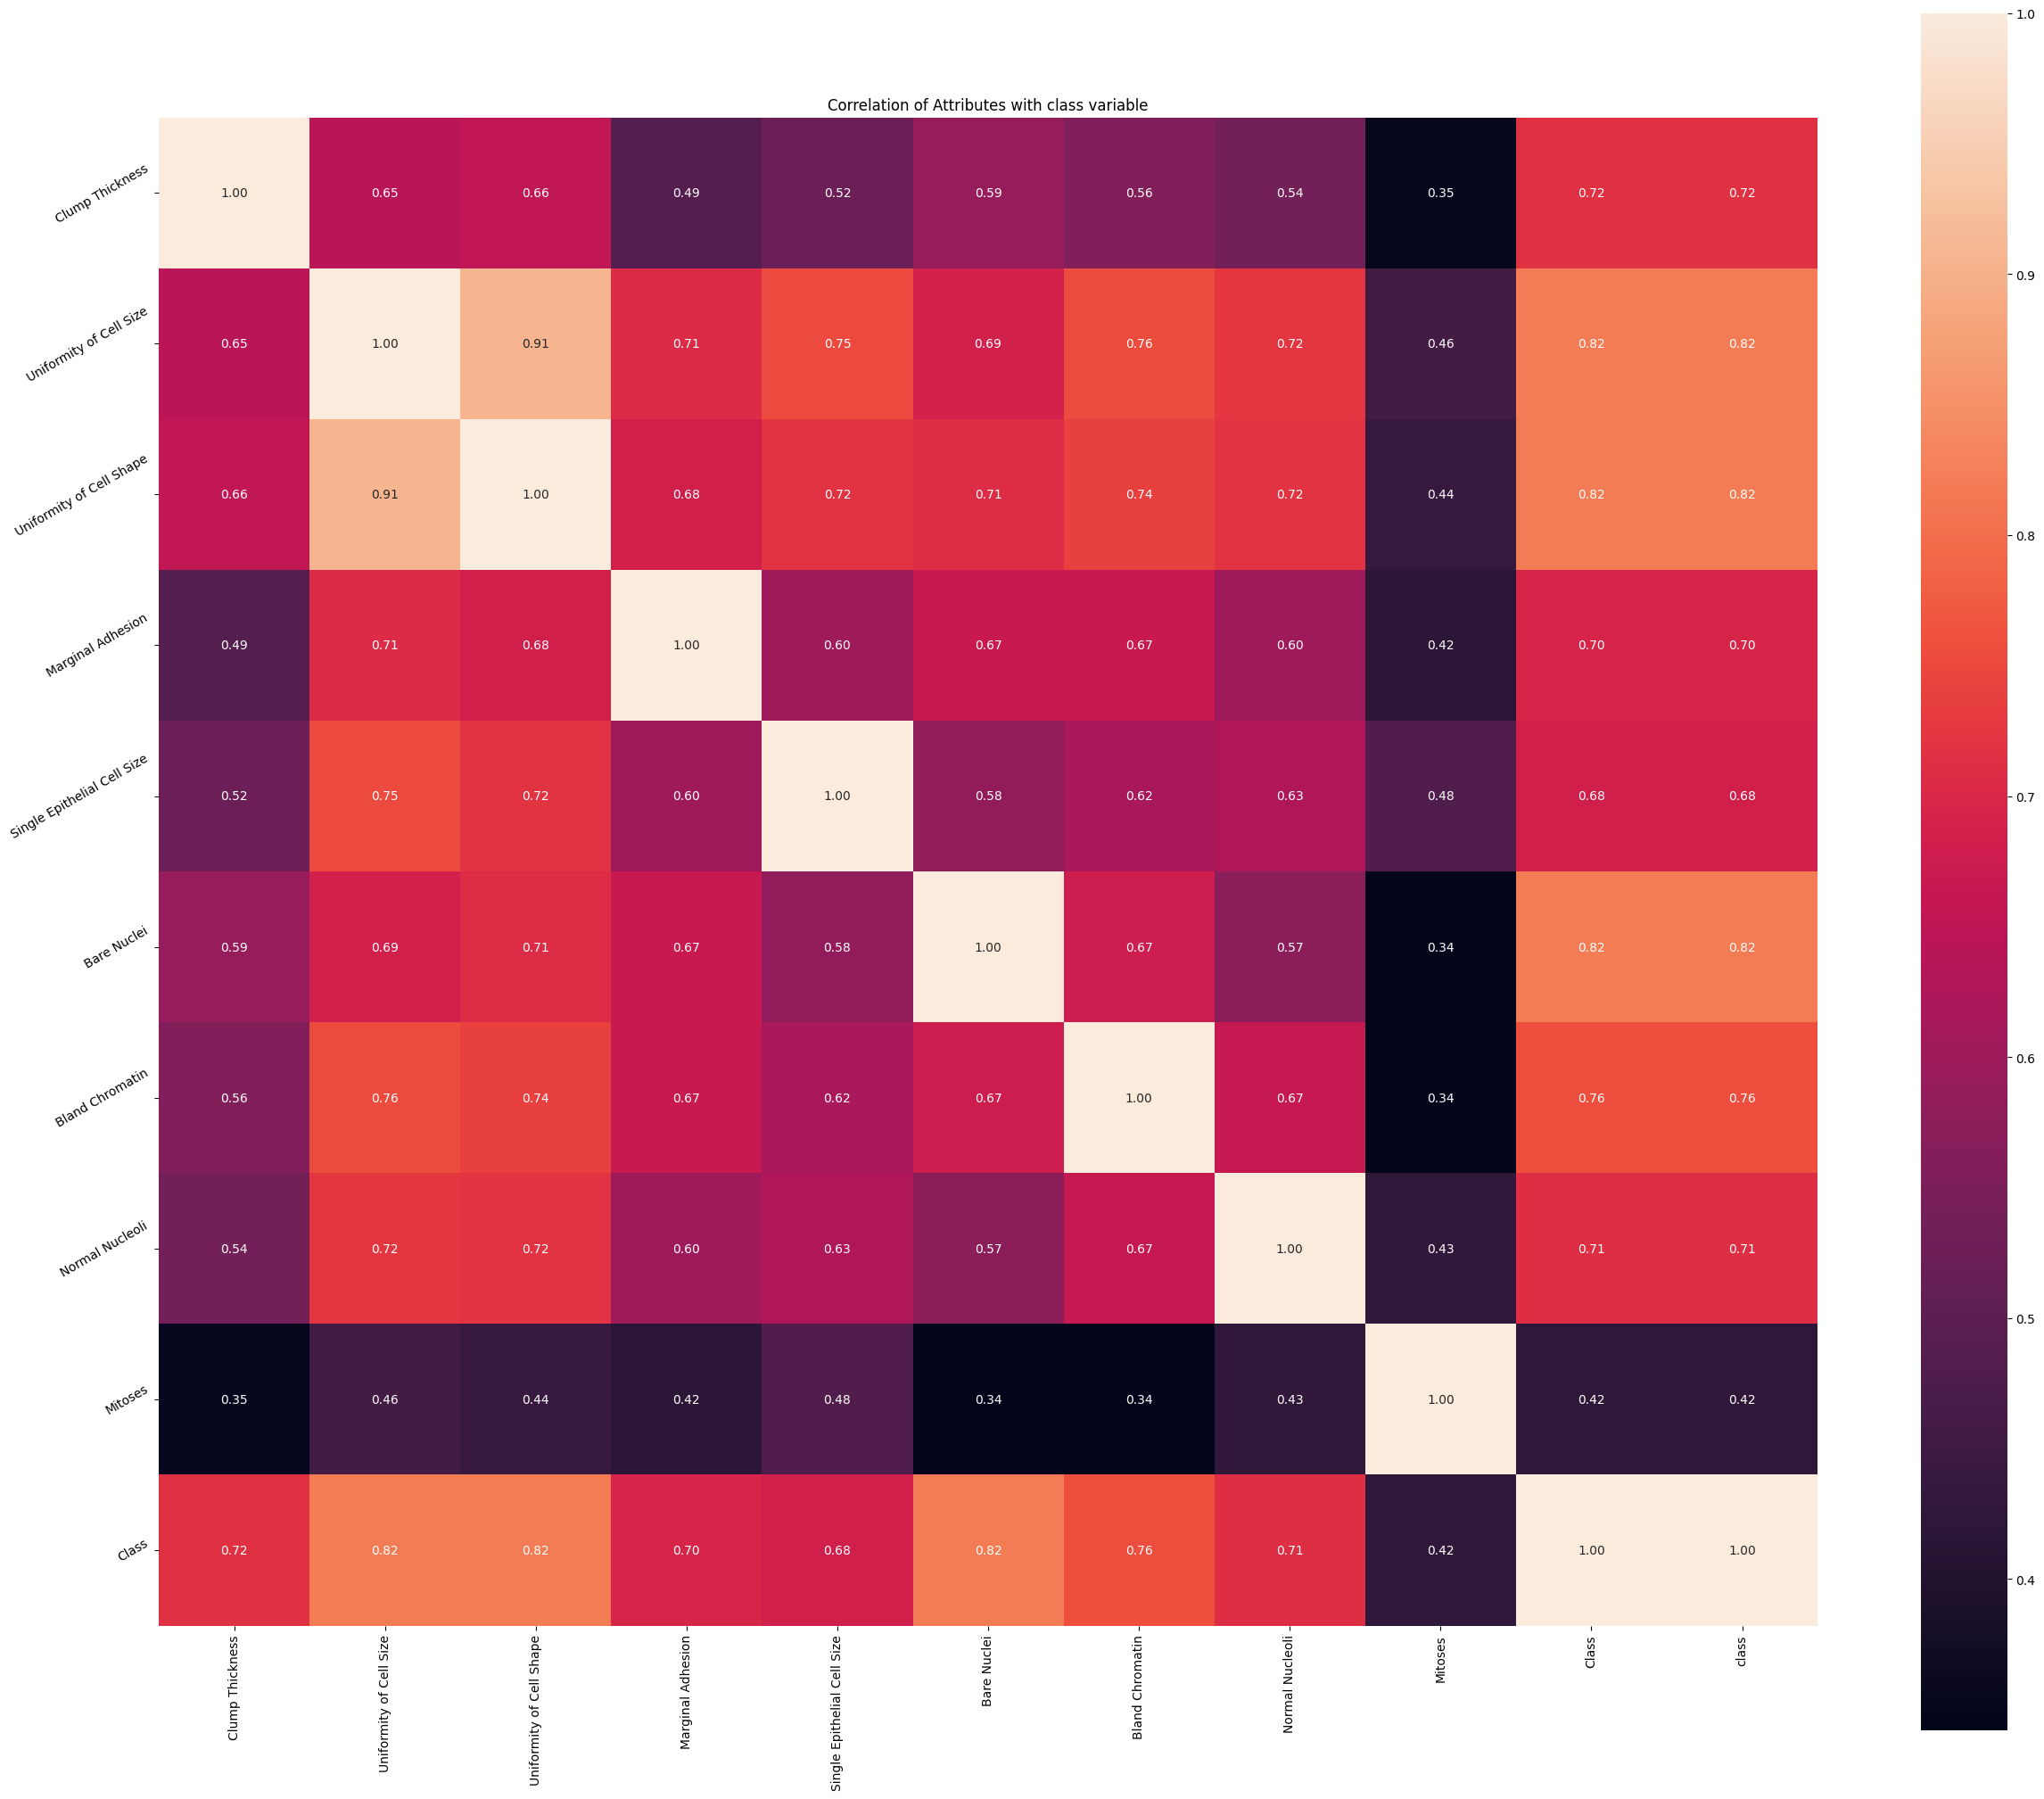

In [52]:
import seaborn as sns
plt.Figure(figsize=(10,8))
plt.title("Correlation of Attributes with class variable")
a=sns.heatmap(correlation,square=True,annot=True,fmt=".2f",linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

# Declare feature vector and target variable

In [59]:
x= datset.drop(['Class'],axis=1)
y= datset['Class']

# Split dataset into training and test set

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
# check shaepe of training and test sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((558, 9), (140, 9), (558,), (140,))

# Feature Engineering

In [62]:
x_train.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
dtype: object

In [64]:
x_train.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [65]:
x_test.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [66]:
x_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
62,6,3,4,1,5,2,3,9,1
193,3,1,1,1,2,1,3,1,1
263,7,9,4,10,10,3,5,3,3
222,7,5,6,3,3,8,7,4,1
140,2,1,1,1,2,1,1,1,1


In [67]:
x_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
603,5,3,2,8,5,10,8,1,2
619,3,1,1,1,2,1,2,1,1
452,4,5,5,8,6,10,10,7,1
85,3,3,6,4,5,8,4,4,1
416,1,1,1,1,2,1,2,1,1


# Feature Scaling

In [68]:
cols=x_train.columns

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [70]:
x_train=pd.DataFrame(x_train,columns=[cols])

In [71]:
x_test=pd.DataFrame(x_test,columns=[cols])

In [72]:
x_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.574621,-0.040143,0.277515,-0.629622,0.775913,-0.384119,-0.171342,1.983330,-0.333601
1,-0.497748,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-0.171342,-0.601658,-0.333601
2,0.932077,1.879857,0.277515,2.541854,2.984890,-0.107196,0.660039,0.044589,0.859663
3,0.932077,0.599857,0.943552,0.075150,-0.107678,1.277420,1.491419,0.367712,-0.333601
4,-0.855205,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-1.002722,-0.601658,-0.333601


# Fit K Neighbors Classifier to the training set

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# Predict Test set Result

In [74]:
y_pred=knn.predict(x_test)
y_pred

array([4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4])

predict_proba method

predict_proba method gives the probabilities for the target variable(2 and 4) in this case, in array form.

2 is for probability of benign cancer and 4 is for probability of malignant cancer.

In [76]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(x_test)[:,0]

array([0.        , 1.        , 0.        , 0.33333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.     

In [78]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(x_test)[:,1]

array([1.        , 0.        , 1.        , 0.66666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.     

# Check Accuracy Score

In [81]:
from sklearn.metrics import accuracy_score
print('Model accuracy score:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score:0.9714


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [82]:
y_pred_train = knn.predict(x_train)

In [83]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9803


Check for overfitting and underfitting